# K-Nearest Neighbour Algorithm
_Writing  a program to implement k-Nearest Neighbour (k-NN) algorithm to classify the iris data set and printing both correct and wrong predictions._

In [28]:
# Imports required packages

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

## Retreiving & Analyzing the Dataset

_This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 array. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width._

In [4]:
# Loads the iris dataset
iris = load_iris(as_frame=True)

In [5]:
# Checks the keys associated with dataset object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
# Checks for the features and their location in the array
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Prints the target classes
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# Prints unique target values
print(np.unique(iris.target))

[0 1 2]


In [9]:
# Shows top few instances combining corresponding target
display(iris.data.assign(target = iris.target).head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Checks the basic information about the dataset
print(iris.data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


The above information shows the dataset has 
- 150 instances,
- 4 numerical features and
- it does not have any missing values.

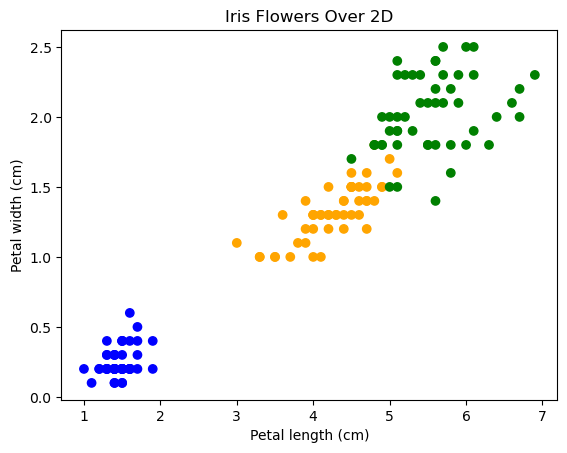

In [12]:
# Displays the irises bases on petal length and petal width  - the two major featues

colormap = np.array([
    'blue',                            # Sets color for setosa
    'orange',                          # Sets color for versicolor
    'green'                            # Sets color for verginica
])

plt.scatter(
    iris.data["petal length (cm)"],    # For feature petal length
    iris.data["petal width (cm)"],     # For feature petal width
    c = colormap[iris.target]          # Used as marker to show labels in different colors
)

plt.xlabel("Petal length (cm)")        # Sets label for x-axis
plt.ylabel("Petal width (cm)")         # Sets label for y-axis
plt.title("Iris Flowers Over 2D")      # Sets title for the plot

plt.show()                             # Renders the plot

## Data Preparation

In [14]:
# Splits the data set into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.3, random_state=42, stratify=iris.target)

In [15]:
# Initializes standard scaler to scale features
iris_std_scaler = StandardScaler()

# Fits the standard scaler and then standarizes the train set
X_train_scaled = iris_std_scaler.fit_transform(X_train)

# Standarizes the test set
X_test_scaled = iris_std_scaler.transform(X_test)

## Modeling

In [17]:
# Initializes K-Nearest Neighbour classifier with default hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fits the model
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Performs predictions on the test set
predictions = knn_clf.predict(X_test)

# Retrieves prediction probability distributions on the test set
prediction_probas = knn_clf.predict_proba(X_test)

In [19]:
# Prints the prediction for first 10 test instances
print("Predictions:", predictions[:10])

Predictions: [2 1 2 1 2 2 1 1 0 2]


In [20]:
# Prints the prediction probabilities for the same test instances
print("Prediction Probabilities:")
print(prediction_probas[:10])

Prediction Probabilities:
[[0.  0.  1. ]
 [0.  0.8 0.2]
 [0.  0.4 0.6]
 [0.  0.8 0.2]
 [0.  0.4 0.6]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]]


## Analyzing Model Performance

**Showing Correct & Incorrect Predictions**

In [46]:
predictions_df = pd.DataFrame(X_test, columns=iris.feature_names)
predictions_df["actual class"] = y_test
predictions_df["predicted class"] = predictions
predictions_df["predicted proba for setosa"] = prediction_probas[:,0]
predictions_df["predicted proba for versicolor"] = prediction_probas[:,1]
predictions_df["predicted proba for verginica"] = prediction_probas[:,2]

display(predictions_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual class,predicted class,predicted proba for setosa,predicted proba for versicolor,predicted proba for verginica
107,7.3,2.9,6.3,1.8,2,2,0.0,0.0,1.0
63,6.1,2.9,4.7,1.4,1,1,0.0,0.8,0.2
133,6.3,2.8,5.1,1.5,2,2,0.0,0.4,0.6
56,6.3,3.3,4.7,1.6,1,1,0.0,0.8,0.2
127,6.1,3.0,4.9,1.8,2,2,0.0,0.4,0.6
140,6.7,3.1,5.6,2.4,2,2,0.0,0.0,1.0
53,5.5,2.3,4.0,1.3,1,1,0.0,1.0,0.0
69,5.6,2.5,3.9,1.1,1,1,0.0,1.0,0.0
20,5.4,3.4,1.7,0.2,0,0,1.0,0.0,0.0
141,6.9,3.1,5.1,2.3,2,2,0.0,0.0,1.0


**Confusion Matrix**

In [25]:
# Prints the accuracy score
print("Accuracy score on test data set: {:.2f}".format(accuracy_score(y_test, predictions)))

Accuracy score on test data set: 0.98


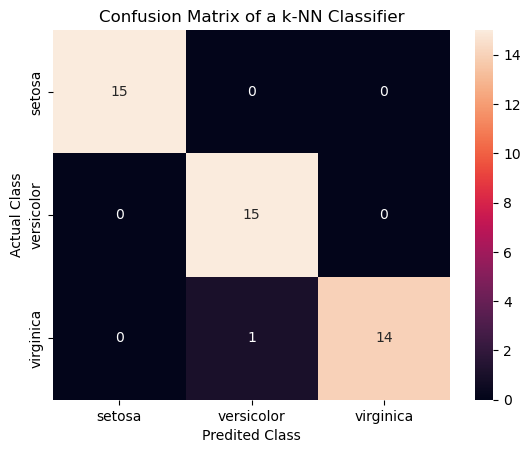

In [38]:
# Calculates Confusion Matrix and draws a heatmap out of that
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1, 2])

sns.heatmap(
    conf_matrix, 
    annot=True, 
    xticklabels=iris.target_names, 
    yticklabels=iris.target_names)

plt.ylabel("Actual Class")
plt.xlabel("Predited Class")
plt.title("Confusion Matrix of a k-NN Classifier")

plt.show()

**Classification Report**

In [175]:
# Prints the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Area under Receiver Operating Characteristics (ROC) Curve**

In [42]:
# Calculates the area under curve
auc_score = roc_auc_score(
    y_test, 
    prediction_probas, 
    multi_class="ovr",
    labels=[0, 1, 2]   # optional
)

print("Area under ROC Curve: {:.3f}".format(auc_score))

Area under ROC Curve: 0.997


## Observations
_Write your observations about the above experiments on Perceptron._